# Getting started with ggplot2

## Intro

try `?qplot` and `??qqplot`, or `!?qplot`, see help documentation for this quick plot function

- `mpg` datasets in [Fuel economy data](#Fuel-economy-data)
- three basic componenets: data, aesthetics and geoms in [Key components](#Key-components)
- beautifying plot in [Colour, size, shape and other aesthetic attributes](#Colour,-size,-shape-and-other-aesthetic-attributes)
- plotting small multiples created by facetting in [Facetting](#Facetting)
- other geoms in [Plot geoms](#Plot-geoms)
- adjusting axes in [Modifying the axis ](#Modifying-the-axis)
- file operation in [Output](#Output)

## Fuel economy data

import `ggplot2` first, you can use other default datasets like `diamonds`

## Colour, size, shape and other aesthetic attributes

In [1]:
library(ggplot2)
head(mpg)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


before learning, in concern with the readability, we will change the default figure size using `repr`

## Key components

1. data: `mpg`
2. aesthetic mappings: engine size → x position, fuel economy → y position
3. layer: points

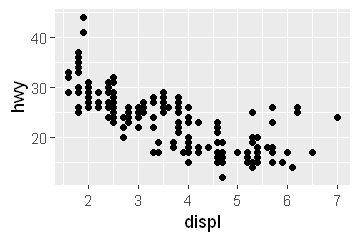

In [2]:
# use package repr to limit the figure size
library(repr)
options(repr.plot.width=3, repr.plot.height=2)

ggplot(mpg, aes(x = displ, y = hwy))+# data and mapping
geom_point()# layer

here `aes()` is to construct aesthetic mappings

## Colour, size, shape and other aesthetic attributes

another mapping, from class variables to color, by adding additional arguments when calling `aes()`

- `colour = colName`
- `shape = colName`
- `size = colName`
- `alpha = alphaNum`: transparency, from $0$ to $1$

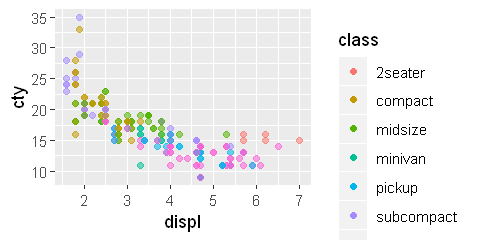

In [3]:
options(repr.plot.width=4, repr.plot.height=2)
ggplot(mpg, aes(displ, cty, colour = class, alpha=0.5)) + 
geom_point()

a scale will be generated automatically

Then to set a fixed aesthetic value, do so in the individual layer outside of `aes()`, like

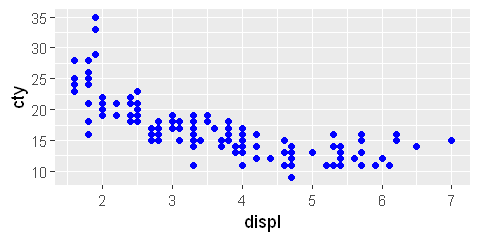

In [4]:
ggplot(mpg, aes(displ, cty)) + geom_point(colour = "blue")

more colors available are listed by running `vignette("ggplot2-specs")`

## Facetting

- splitting the data into subsets
- displaying the similar graph for each subset
- put graphs into a table

types of facetting

- grid
- wrapped

below is an example of using wrapped facetting, add `facet_wrap(~colName)` to facet your data according to that column

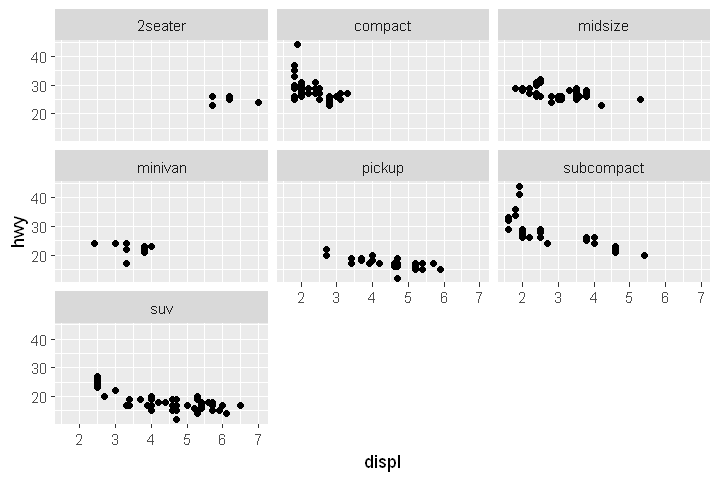

In [5]:
options(repr.plot.width=6, repr.plot.height=4)
ggplot(mpg, aes(displ, hwy)) + 
geom_point() + 
facet_wrap(~class)

## Plot geoms

- `geom_smooth()`: fits a smoother to the data; displays the smooth and its standard error
- `geom_boxplot()`: produces a box-and-whisker plot to summarise the distribution of a set of points
- `geom_histogram()`: shows histogram, default for 1d data
- `geom_freqpoly()` shows frequency polygon, the distribution of continuous variables *(seems to cause bugs sometime)*
- `geom_bar()` shows the distribution of categorical variables
- `geom_path()`: draws lines between points, in any direction
- `geom_line()`: draws lines between points from left to right, often used when dealing with time

###  Adding a smoother to a plot

Note that smoother layer is under points layer so add points layer first (change the order if you want)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


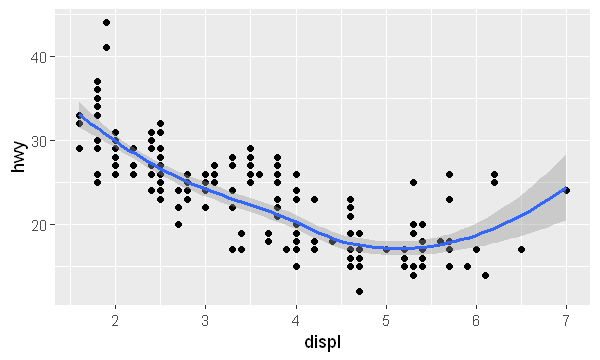

In [6]:
options(repr.plot.width=5, repr.plot.height=3)
ggplot(mpg, aes(displ, hwy)) + 
geom_point() + 
geom_smooth()

to disable showing the standard error, add another argument: `se=FALSE` to function `geom_smooth()`

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


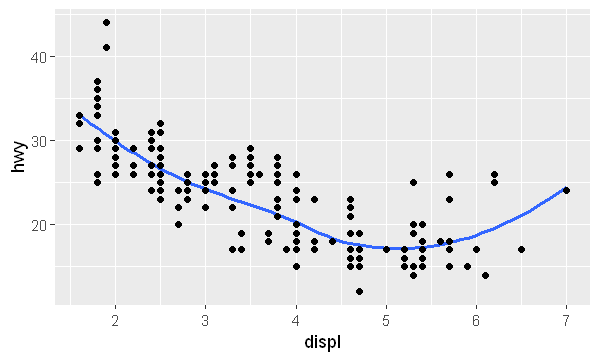

In [7]:
ggplot(mpg, aes(displ, hwy)) + 
geom_smooth(se=FALSE) + 
geom_point()

and you can see that there're different regression methods available. The default method we just encounter is

- `method='loess'`, which have another argument: `span=wigglyDegree`, from $0$ to $1$, as how wiggly the curve should be. This method is not for datasets with over $1000$ observations (it's $O(n^2)$)
- `method='gam'`, **generalised additive model**, which require package `mgcv`
    - default formula: `formula = y ~ s(x)`
    - large data: `formula = y ~ s(x, bs = "cs")`
- `method='lm'`, linear model
- `method='rlm'`, linear model with robust fitting, require package `mass`

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


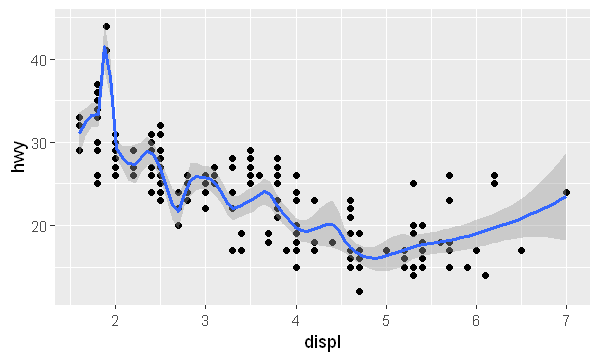

In [8]:
ggplot(mpg, aes(displ, hwy)) + 
geom_point() + 
geom_smooth(span = 0.2)

Loading required package: nlme
This is mgcv 1.8-28. For overview type 'help("mgcv-package")'.


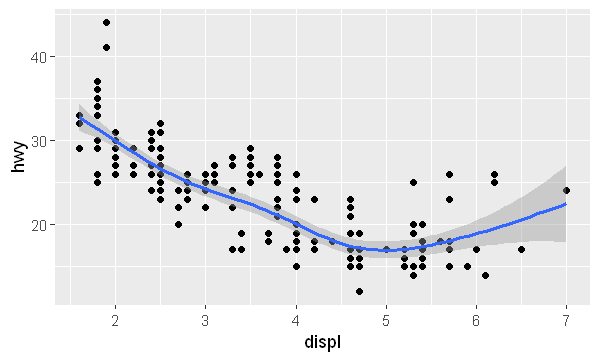

In [9]:
library(mgcv)
ggplot(mpg, aes(displ, hwy)) + 
geom_point() + 
geom_smooth(method = "gam", formula = y ~ s(x))

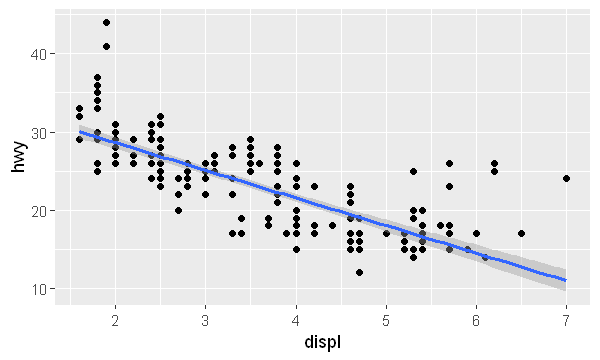

In [10]:
ggplot(mpg, aes(displ, hwy)) + 
geom_point() + 
geom_smooth(method = "lm")

### Boxplots and jittered points

when dealing with a categorical variable and one or more continuous variables, we may want to know, *how the continuous variables distributed under different category*

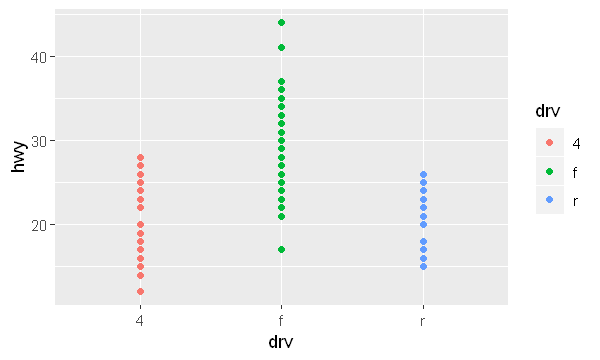

In [11]:
ggplot(mpg, aes(drv, hwy, colour = drv)) + 
geom_point()

advanced plot functions to avoid overplotting

- `geom_jitter()`, Jittering, adds a little random noise to the data which can help avoid overplotting. Accept arguments:
    - `color`
    - `size`
    - `shape`
    - `width`, control the width of the noise
- `geom_boxplot()`, Boxplots, summarise the shape of the distribution with a handful of summary statistics. Accept arguments:
    - `color`
    - `fill`: the color to fill
- `geom_violin()`, Violin plots, show a compact representation of the “density” of the distribution, highlighting the areas where more points are found. Accept arguments:
    - `color`
    - `fill`

here's a comparison between the three, we need a multiplot function first.

In [12]:
# multiplot function from Cookbook for R by Winston Chang
# http://www.cookbook-r.com/Graphs/Multiple_graphs_on_one_page_(ggplot2)/
multiplot <- function(..., plotlist=NULL, file, ncol=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'ncol' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of column
    layout <- matrix(seq(1, ncol * ceiling(numPlots/ncol)),
                    ncol = ncol, nrow = ceiling(numPlots/ncol))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

In [13]:
plot1 <- ggplot(mpg, aes(drv, hwy)) + geom_jitter(color='red')
plot2 <- ggplot(mpg, aes(drv, hwy)) + geom_boxplot(color='green', fill='yellow')
plot3 <- ggplot(mpg, aes(drv, hwy)) + geom_violin(color='blue', fill='red')

### Histograms and frequency polygons

to show the distribution of a single numeric variable

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


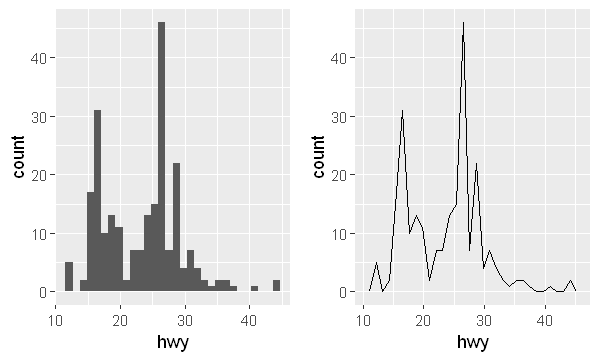

In [14]:
plot1 <- ggplot(mpg, aes(hwy)) + geom_histogram()
plot2 <- ggplot(mpg, aes(hwy)) + geom_freqpoly()
multiplot(plot1,plot2,ncol=2)

binwidth is the width to bin the data, add arguments `binwidth=binWidth` to control it

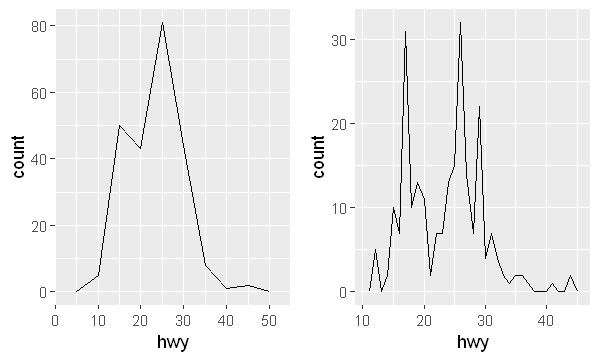

In [15]:
plot1 <- ggplot(mpg, aes(hwy)) + geom_freqpoly(binwidth = 5)
plot2 <- ggplot(mpg, aes(hwy)) + geom_freqpoly(binwidth = 1)
multiplot(plot1,plot2,ncol=2)

`geom_density()` is not recommanded.

`geom_freqpoly()` accept arguments `color=colName`, `geom_histogram()` accept arguments `fill=colName`

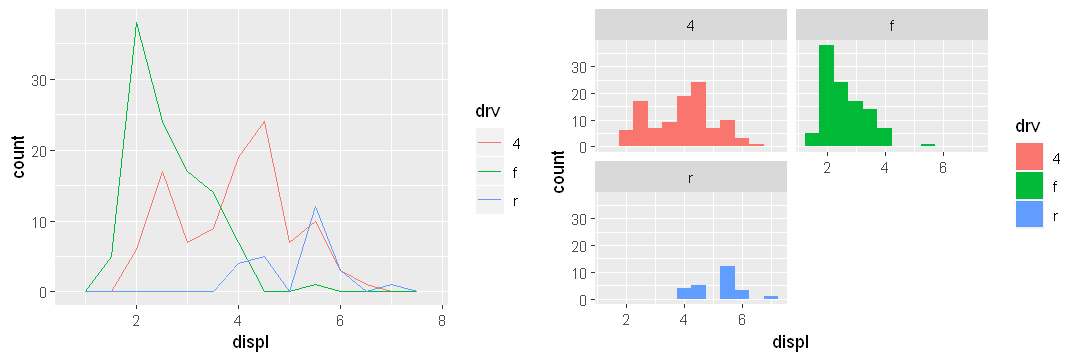

In [16]:
options(repr.plot.width=9, repr.plot.height=3)
plot1 <- ggplot(mpg, aes(displ, colour = drv)) + 
geom_freqpoly(binwidth = 0.5)
plot2 <- ggplot(mpg, aes(displ, fill = drv)) + 
geom_histogram(binwidth = 0.5) + 
facet_wrap(~drv, ncol = 2)

multiplot(plot1,plot2,ncol=2)

add arguments `ncol=colNum` to control the grid when facetting。

### Bar charts

`geom_bar()`, for 1d variables

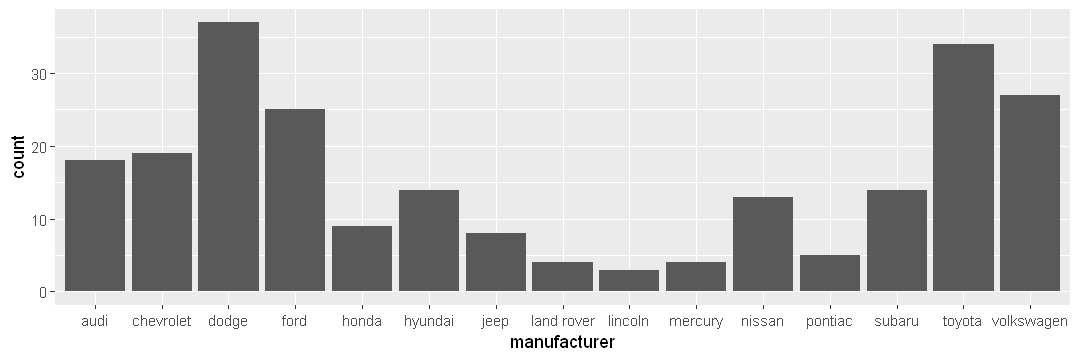

In [17]:
ggplot(mpg, aes(manufacturer)) + 
geom_bar()

the above bar chart is for unsummarised data, another bar chart is just the data, same as point chart like the following

for `geom_bar()`, add parameter `stat = "identity"` to show the number, not to bin and count.

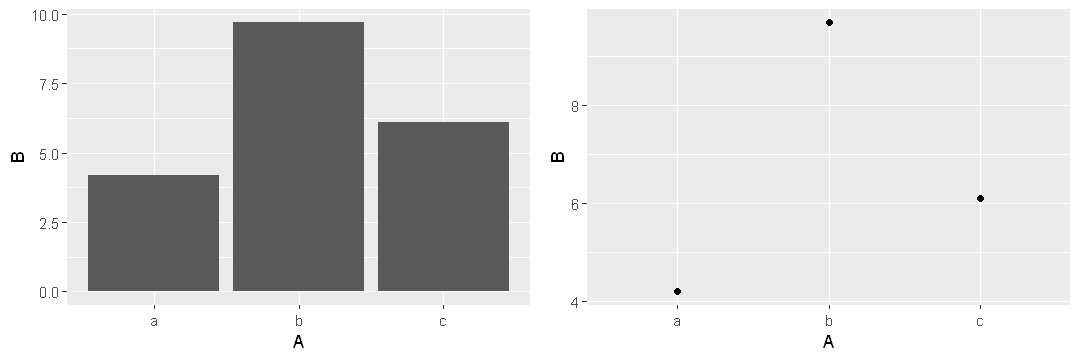

In [18]:
myDF <- data.frame(
  A = c("a", "b", "c"),
  B = c(4.2, 9.7, 6.1)
)
plot1 <- ggplot(myDF, aes(A, B)) + geom_bar(stat = "identity")
plot2 <- ggplot(myDF, aes(A, B)) + geom_point()
multiplot(plot1,plot2,ncol=2)

just the same with `geom_point()`, so, not recommended

### Time series with line and path plots

using `economics` dataset

date,pce,pop,psavert,uempmed,unemploy
1967-07-01,507.4,198712,12.5,4.5,2944
1967-08-01,510.5,198911,12.5,4.7,2945
1967-09-01,516.3,199113,11.7,4.6,2958
1967-10-01,512.9,199311,12.5,4.9,3143
1967-11-01,518.1,199498,12.5,4.7,3066
1967-12-01,525.8,199657,12.1,4.8,3018


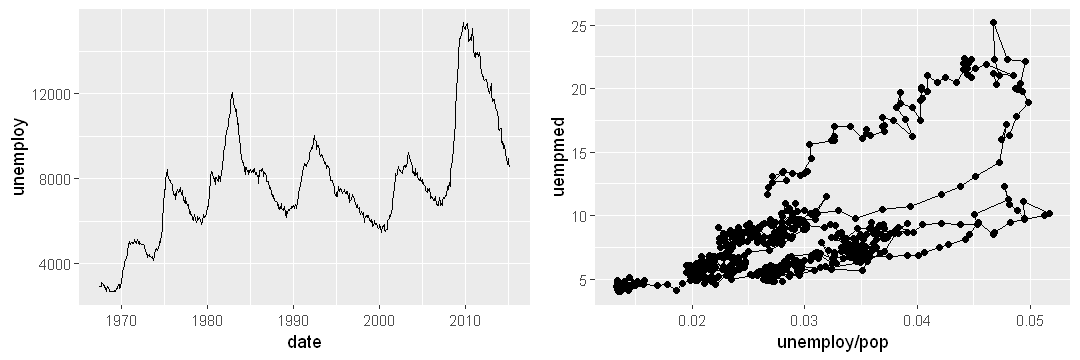

In [23]:
head(economics)
plot1 <- ggplot(economics, aes(date, unemploy)) + geom_line()
plot2 <- ggplot(economics, aes(unemploy / pop, uempmed)) + geom_path() + geom_point()
multiplot(plot1,plot2,ncol=2)

line plot is used to track *one* variable with time; path plot is to show how *two* variables change together

To see how the two variables change with time, add color to it

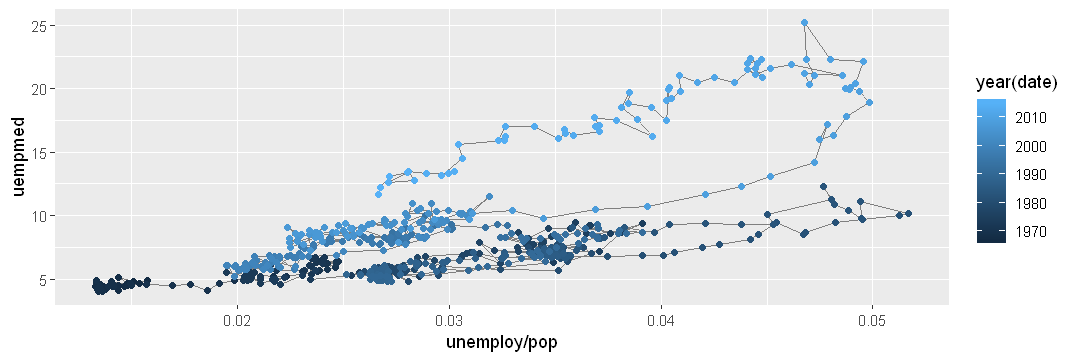

In [20]:
year <- function(x) as.POSIXlt(x)$year + 1900
ggplot(economics, aes(unemploy / pop, uempmed)) + 
geom_path(colour = "grey50") + # grey50 is an implemented color
geom_point(aes(colour = year(date)))

`as.POSIXlt(x)` is a date-time conversion function, see documentation.

## Modifying the axes

- `xlab()` and `ylab()` modify the x- and y-axis labels
- `xlim()` and `ylim()` modify the limits of axes

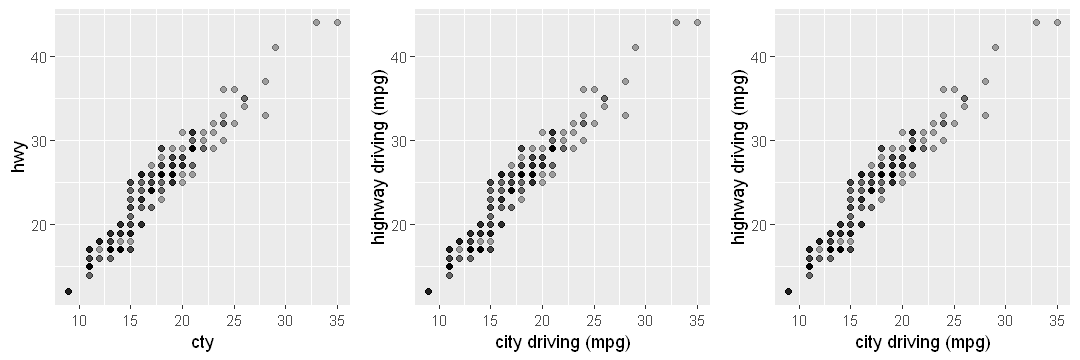

In [28]:
plot1 <- ggplot(mpg, aes(cty, hwy)) +
geom_point(alpha = 1 / 3)

plot2 <- ggplot(mpg, aes(cty, hwy)) +
geom_point(alpha = 1 / 3) + 
xlab("city driving (mpg)") + 
ylab("highway driving (mpg)")

# Remove the axis labels with NULL
plot3 <- ggplot(mpg, aes(cty, hwy)) +
geom_point(alpha = 1 / 3) + 
xlab(NULL) + 
ylab(NULL)

multiplot(plot1,plot2,plot2，ncol=3)

Warning message:
"Removed 137 rows containing missing values (geom_point)."Warning message:
"Removed 137 rows containing missing values (geom_point)."

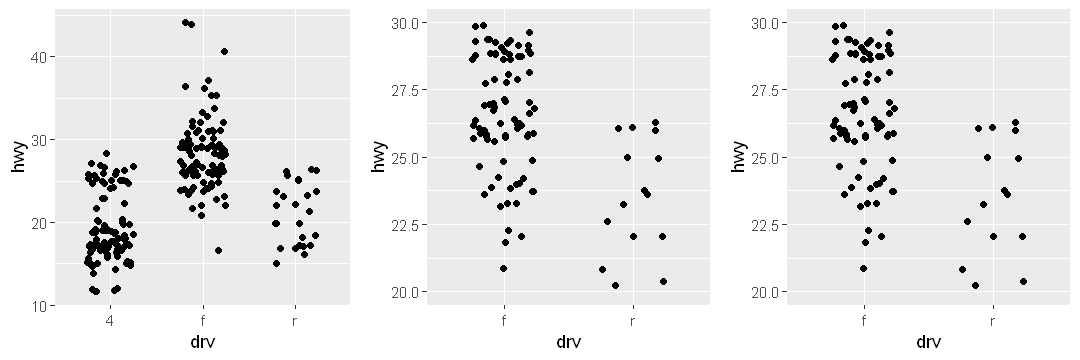

In [30]:
plot1 <- ggplot(mpg, aes(drv, hwy)) +
geom_jitter(width = 0.25)

plot2 <- ggplot(mpg, aes(drv, hwy)) +
geom_jitter(width = 0.25) + 
xlim("f", "r") + 
ylim(20, 30)
  
# For continuous scales, use NA to set only one limit
plot3 <- ggplot(mpg, aes(drv, hwy)) +
geom_jitter(width = 0.25, na.rm = TRUE) + 
ylim(NA, 30)

multiplot(plot1,plot2,plot2，ncol=3)

set `na.rm = TRUE` to remove missing values silently, otherwise with a warming. And about setting `ylim` with `NA`, just to be careful when dealing with summary statistics.

## Output

- `print()`, show the plot
- `ggsave()`, save the plot
- `summary()`, breifly describe the plot
- `saveRDS()` and `readRDS()`, save and read the plot object

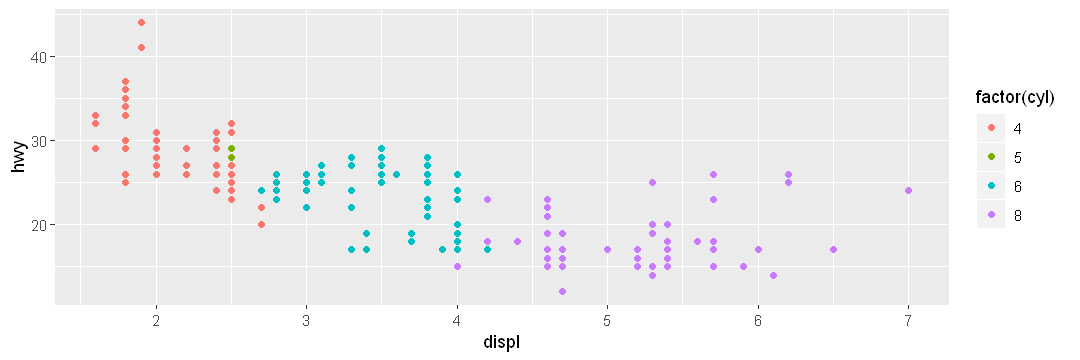

In [31]:
p <- ggplot(mpg, aes(displ, hwy, colour = factor(cyl))) + geom_point()
print(p)

In [33]:
ggsave("./assets/plot.png", width = 5, height = 5)
summary(p)

data: manufacturer, model, displ, year, cyl, trans, drv, cty, hwy, fl,
  class [234x11]
mapping:  x = ~displ, y = ~hwy, colour = ~factor(cyl)
faceting: <ggproto object: Class FacetNull, Facet, gg>
    compute_layout: function
    draw_back: function
    draw_front: function
    draw_labels: function
    draw_panels: function
    finish_data: function
    init_scales: function
    map_data: function
    params: list
    setup_data: function
    setup_params: function
    shrink: TRUE
    train_scales: function
    vars: function
    super:  <ggproto object: Class FacetNull, Facet, gg>
-----------------------------------
geom_point: na.rm = FALSE
stat_identity: na.rm = FALSE
position_identity 



In [34]:
saveRDS(p, "./assets/plot.rds")
q <- readRDS("./assets/plot.rds")

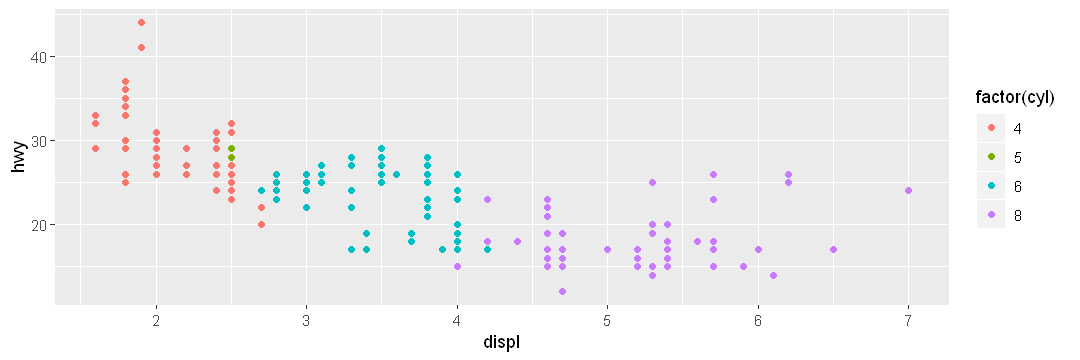

In [35]:
print(q)